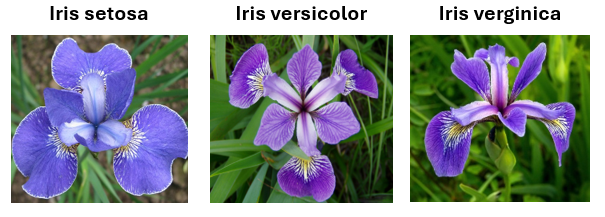

# IRIS FLOWER CLASSIFICATION

## Objectives:

1. Train a Machine Learning model that can learn from the measurements of the Iris and classify them.

# Import Libraries:

In [46]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset:

In [2]:
df = pd.read_csv('C:\\Users\\surface\\wqu\\Intership_Projects\\Iris.csv')

In [40]:
# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
df.head(5)

First few rows of the Iris dataset:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis:

In [4]:
#Inscpect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Summary Statistics
print("\nSummary statistics of the Iris dataset:")
df = df.drop(columns=["Id"]) 
df.describe()


Summary statistics of the Iris dataset:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Distribution of species
print("\nDistribution of species:")
print(df["Species"].value_counts())


Distribution of species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [9]:
# Calculate skewness, kurtosis, mean, and median of each feature
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)

# Create a data frame to display the results
summary_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Mean': mean,
    'Median': median
})

print(summary_stats)

               Skewness  Kurtosis      Mean  Median
SepalLengthCm  0.314911 -0.552064  5.843333    5.80
SepalWidthCm   0.334053  0.290781  3.054000    3.00
PetalLengthCm -0.274464 -1.401921  3.758667    4.35
PetalWidthCm  -0.104997 -1.339754  1.198667    1.30


Skewness measures the asymmetry of the distribution. From the summary statistics, the skewness values for all features are close to 0, it suggests that the data is relatively symmetric and follows normal distribution.

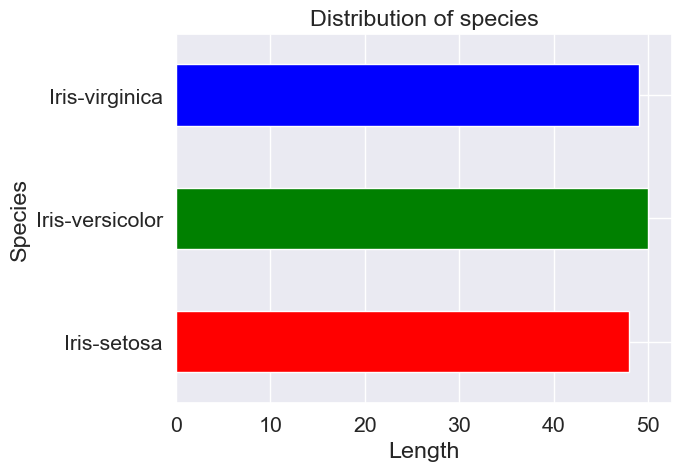

In [41]:
df.groupby("Species").size().plot(kind="barh", 
                                  color = ["red", "green", "blue"],
                                  xlabel="Length",
                                  ylabel="Species",
                                  title="Distribution of species"
);

# Check Missing Values, Duplicates and Outliers:

In [42]:
# Distribution of species
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Here, there are 3 duplicate rows in the data. We can remove this as this won't affect the results much and won't cause any remarkable imbalances

In [14]:
df=df.drop_duplicates()

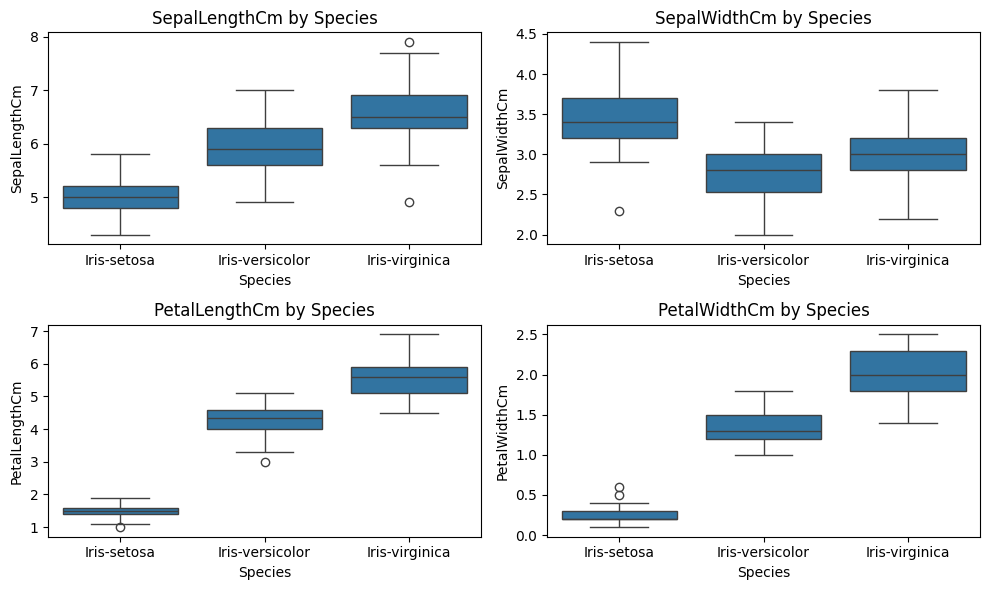

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Box plots for SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm
sns.boxplot(x="Species", y="SepalLengthCm", data=df, ax=axs[0, 0])
sns.boxplot(x="Species", y="SepalWidthCm", data=df, ax=axs[0, 1])
sns.boxplot(x="Species", y="PetalLengthCm", data=df, ax=axs[1, 0])
sns.boxplot(x="Species", y="PetalWidthCm", data=df, ax=axs[1, 1])

# Set titles for each subplot
axs[0, 0].set_title("SepalLengthCm by Species")
axs[0, 1].set_title("SepalWidthCm by Species")
axs[1, 0].set_title("PetalLengthCm by Species")
axs[1, 1].set_title("PetalWidthCm by Species")

# Adjust ticks and labels
for ax in axs.flat:
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


# Visualizations

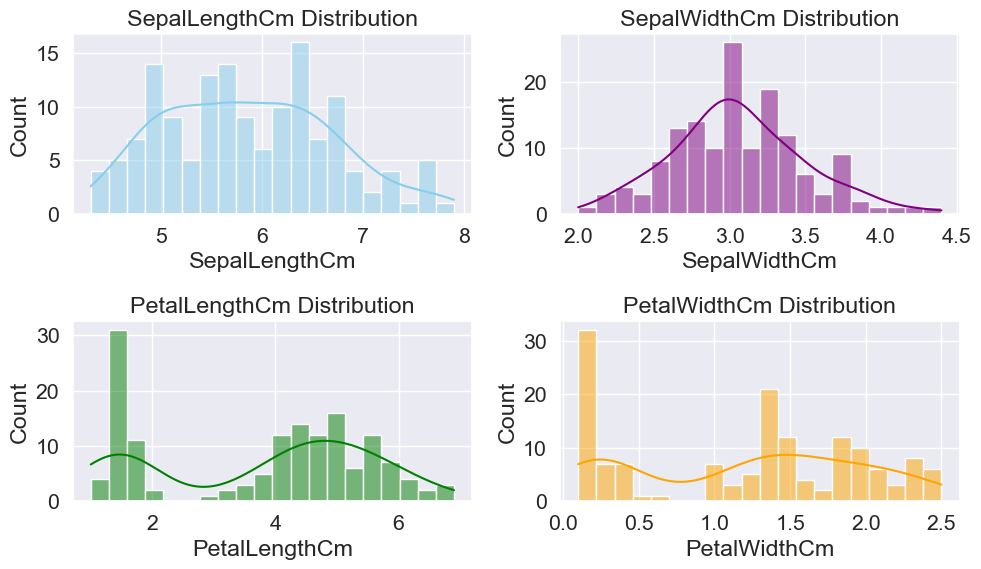

In [38]:
# Feature Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df["SepalLengthCm"], kde=True, bins=20, color="skyblue")
plt.title("SepalLengthCm Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df["SepalWidthCm"], kde=True, bins=20, color="purple")
plt.title("SepalWidthCm Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df["PetalLengthCm"], kde=True, bins=20, color="green")
plt.title("PetalLengthCm Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df["PetalWidthCm"], kde=True, bins=20, color="orange")
plt.title("PetalWidthCm Distribution")

plt.tight_layout()
plt.show()

SepalLengthCm Distribution: The histogram appears approximately normal, with a peak around 6.4. This suggests that sepal lengths are relatively evenly distributed, with a slight tendency towards longer lengths.

SepalWidthCm Distribution: The histogram shows a slightly skewed distribution towards higher values of sepal width, with a peak around 3.0. This suggests that while most sepal widths are around 3.0, there are some observations with wider sepals.

PetalLengthCm Distribution: The histogram indicates a clear bimodal distribution, with peak around 1.5.

PetalWidthCm Distribution:The histogram for petal width shows a peak around 0.25.

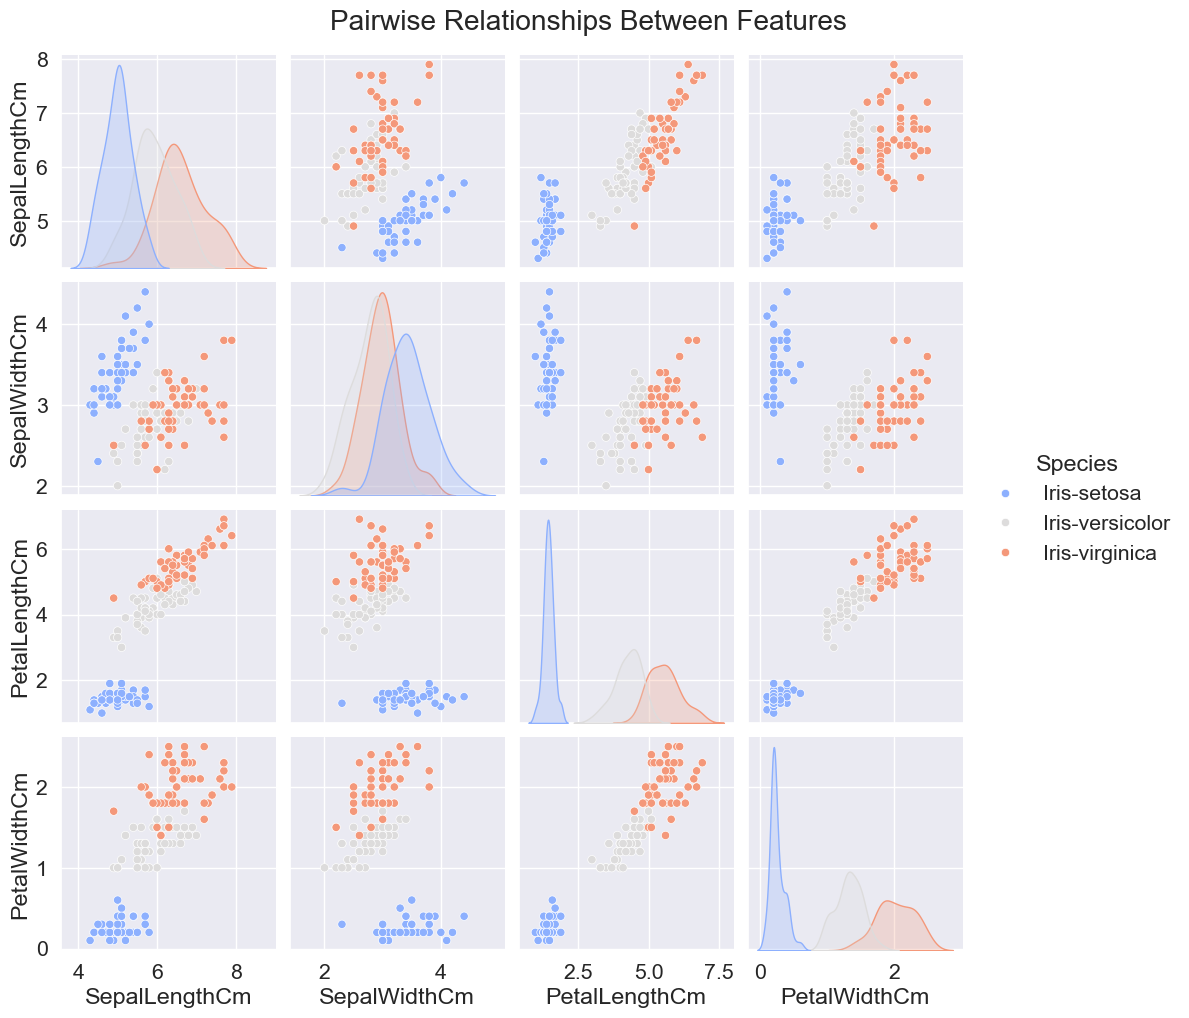

In [43]:
# Pairwise Relationships
sns.pairplot(df, hue="Species", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

It is clear that, iris-verginica have larger sepals but iris-setosa have greater sepal length. The iris-verginica has larger petals and iris-setosa have smaller petals. Iris-versicolor falls in the middle.

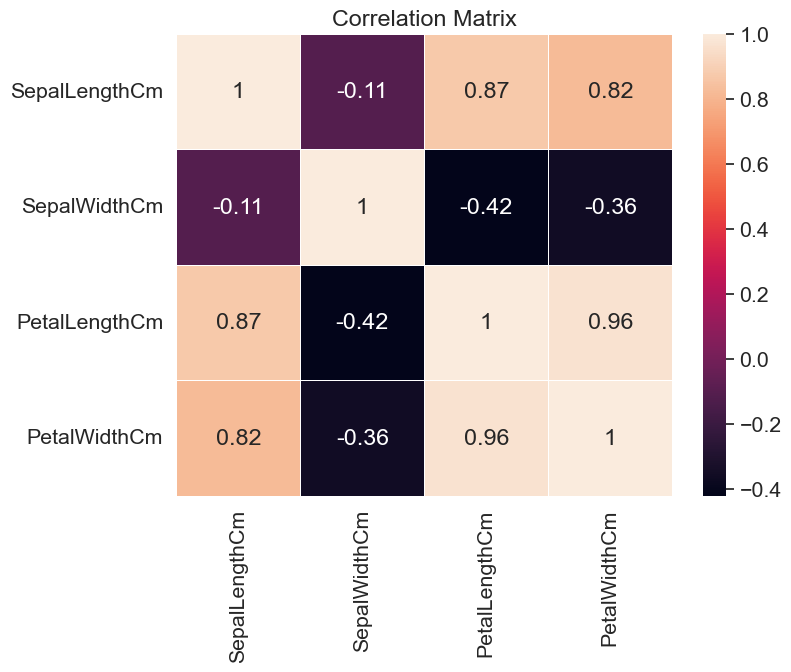

In [44]:
# Exclude the non-numeric column
numeric_df = df.drop(columns=["Species"])  
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


The correlation heatmap shows that there is a strong association between petal length and width, a fair correlation between petal width and sepal length, and a strong correlation between petal length and sepal length.

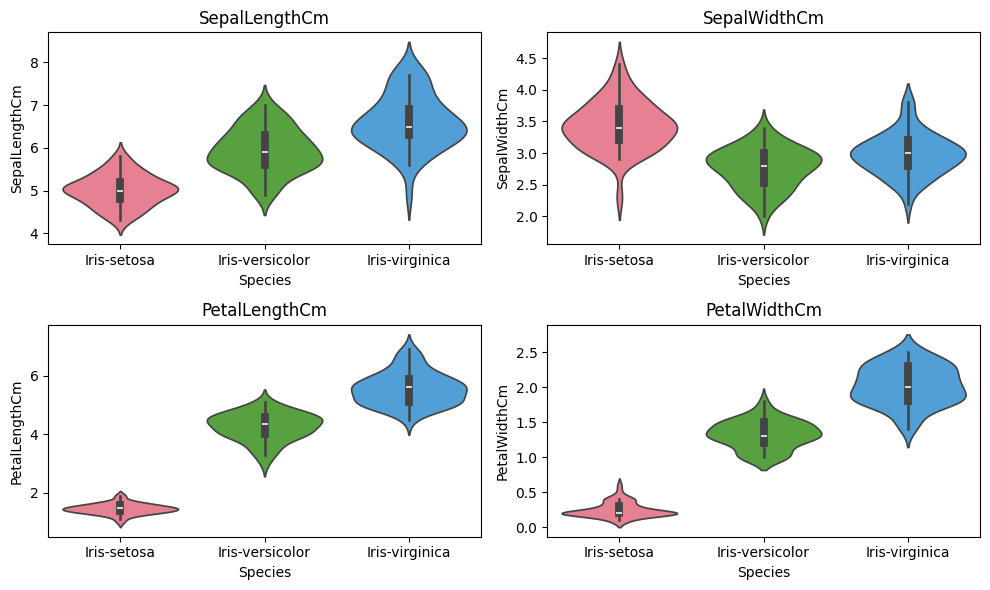

In [19]:
# Create violin plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", hue="Species",  y="SepalLengthCm", data=df, palette='husl')
plt.title("SepalLengthCm")

plt.subplot(2, 2, 2)
sns.violinplot(x="Species", hue="Species", y="SepalWidthCm", data=df, palette='husl')
plt.title("SepalWidthCm")

plt.subplot(2, 2, 3)
sns.violinplot(x="Species", hue="Species", y="PetalLengthCm", data=df, palette='husl')
plt.title("PetalLengthCm")

plt.subplot(2, 2, 4)
sns.violinplot(x="Species",hue="Species",  y="PetalWidthCm", data=df, palette='husl')
plt.title("PetalWidthCm")

plt.tight_layout()
plt.show()
     

For sepal length, Setosa tends to have shorter lengths compared to Versicolor and Virginica, which have  analogous distributions. Sepal  range distributions are  fairly  analogous across the species, with Setosa having slightly wider sepals on average. Setosa has shorter and narrower petals compared to Versicolor and Virginica, which have longer and wider petals.There's  minimum imbrication between the distributions of petal lengths and  extents for the different species, making these features effective for species isolation. 

# Data Processing:

In [21]:
# Split the dataset into features (X) and target (y)
X = df.drop("Species", axis=1)
y = df["Species"]

Here, the "Species" column is categorical. it's necessary to encode categorical variables, such as the "Species" column in this dataset, into numerical values.

In [22]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train" , X_train.shape)
print("X_test" , X_test.shape)
print("y_train" , y_train.shape)
print("y_test" , y_test.shape)
     

X_train (117, 4)
X_test (30, 4)
y_train (117,)
y_test (30,)


# Model Building and Training

In [25]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation:

In [27]:
# Predict the classes for test data
y_pred = model.predict(X_test)

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [29]:

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [30]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



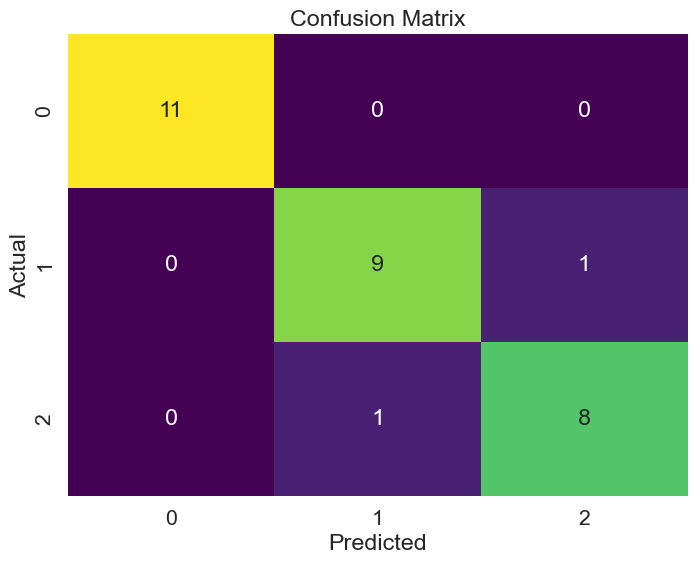

In [37]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Prediction

For example prediction, gave a sample input to the model with the values of First row in the dataset to check the output.

In [32]:
#First rpw
df.iloc[0]

SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

In [33]:
# Give a sample input data point features (SepalLengthCm, SepalWidthCm, PetalLengthCm,PetalWidthCm)
sample_input = [[5.1, 3.5, 1.4, 0.2]]

predicted_label = model.predict(sample_input)
predicted_species = label_encoder.inverse_transform(predicted_label)
print("True Species:")
print(df.head(1))
print()
print("Sample input:", sample_input)
print("Predicted Species:", predicted_species)

True Species:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa

Sample input: [[5.1, 3.5, 1.4, 0.2]]
Predicted Species: ['Iris-setosa']


In [35]:
predicted_species = label_encoder.inverse_transform(y_pred)
true_species = label_encoder.inverse_transform(y_test)
comparison_df = pd.DataFrame({'Predicted Species': predicted_species, 'True Species': true_species}).head()
comparison_df

,Predicted Species,True Species
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-virginica
